#### Author -- Ankit Chaudhary 



# ----------------------INTRODUCTION-------------------
# Understanding Perceptrons and Neural Networks



## Table of Contents
1. Introduction
2. Perceptron Components
3. Implementation
4. Training Example
5. Visualization

In this notebook, we'll explore perceptrons - the building blocks of neural networks. We'll implement one from scratch and see how it learns.

In [143]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Theory

![Description of the image](perceptron3.png)

## Perceptron Components

A perceptron has these key components:
1. Inputs (x₁, x₂, ..., xₙ)
2. Weights (w₁, w₂, ..., wₙ)
3. Bias (b)
4. Activation function

The mathematical formula is:
$$ y = f(\sum_{i=1}^{n} w_i x_i + b) $$

Where f is the activation function:
$$ f(z) = \begin{cases} 
1 & \text{if } z > 0 \\
0 & \text{if } z \leq 0
\end{cases} $$




In [144]:
class Perceptron:
    def __init__(self, input_size):
        # Initialize weights and bias with small random values
        self.weights = np.random.randn(input_size) * 0.01
        self.bias = np.random.randn() * 0.01
    
    def activate(self, x):
        # Compute weighted sum and apply step function
        z = np.dot(self.weights, x) + self.bias
        return 1 if z > 0 else 0
    
    def train(self, X, y, learning_rate=0.1, epochs=100):
        errors = []  # Track errors for plotting
        for epoch in range(epochs):
            epoch_errors = 0
            for x_i, y_i in zip(X, y):
                # Make prediction
                prediction = self.activate(x_i)
                # Calculate error
                error = y_i - prediction
                epoch_errors += abs(error)
                # Update weights and bias
                self.weights += learning_rate * error * x_i
                self.bias += learning_rate * error
            errors.append(epoch_errors)
        return errors

In [145]:
# Cell 5 - Training Data [Code]

# Training data for AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create and train perceptron
perceptron = Perceptron(input_size=2)
training_errors = perceptron.train(X, y)


Final weights: [0.19717461 0.0154117 ]
Final bias: -0.20751827176673657

Testing the perceptron:
Input: [0 0], Output: 0
Input: [0 1], Output: 0
Input: [1 0], Output: 0
Input: [1 1], Output: 1


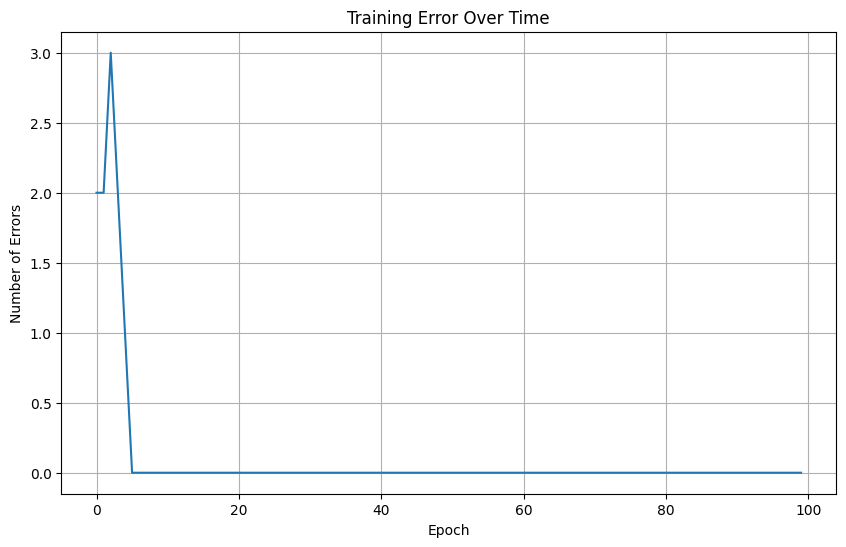

In [146]:
# Print results
print("Final weights:", perceptron.weights)
print("Final bias:", perceptron.bias)
print("\nTesting the perceptron:")
for x_i in X:
    prediction = perceptron.activate(x_i)
    print(f"Input: {x_i}, Output: {prediction}")


# Training Visualization 

plt.figure(figsize=(10, 6))
plt.plot(training_errors)
plt.title('Training Error Over Time')
plt.xlabel('Epoch')
plt.ylabel('Number of Errors')
plt.grid(True)
plt.show()


In [147]:

def plot_decision_boundary():
    # Create a mesh grid
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Get predictions for each point in the mesh
    Z = np.array([perceptron.activate([x, y]) 
                 for x, y in zip(xx.ravel(), yy.ravel())])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)
    plt.title('Perceptron Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.show()

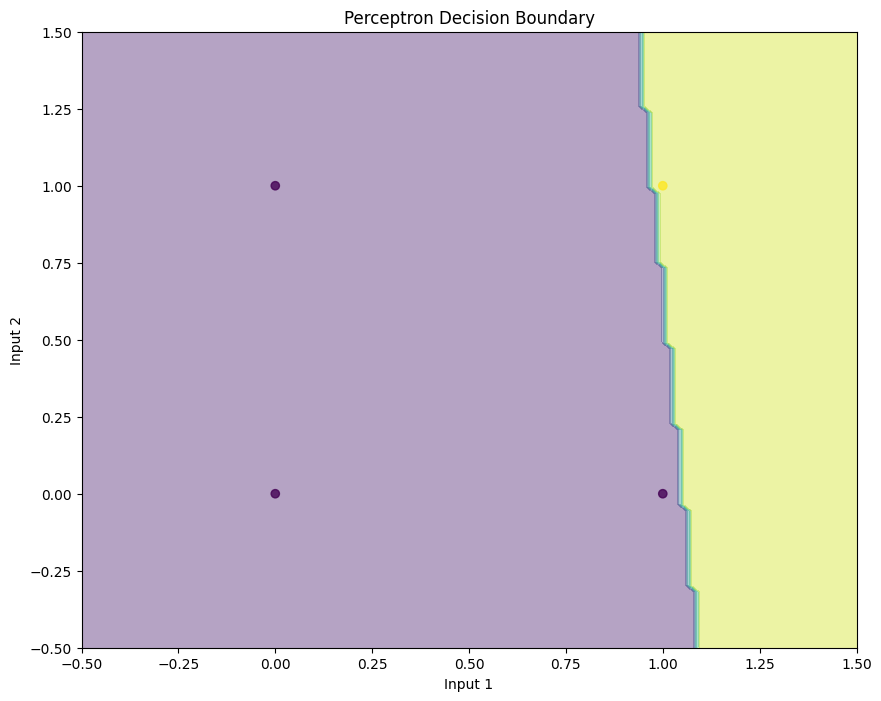

In [148]:
# Cell 9 - Plot Decision Boundary
plot_decision_boundary()


#  Exercises 
## Exercises

1. Modify the code to implement OR gate
2. Try different learning rates and observe the effect
3. Implement XOR gate (this won't work! Can you figure out why?)
4. Add momentum to the training process
5. Implement different activation functions

## Additional Notes

Remember that perceptrons can only learn linearly separable patterns. This means:
* They work for AND and OR gates
* They fail for XOR gate
* They form the foundation for more complex neural networks

To handle non-linear problems, we need:
1. Multiple layers (Multi-Layer Perceptron)
2. Different activation functions (like sigmoid, ReLU)
3. Backpropagation for training

## Extra

## Multple Input

Epoch 0, Loss: 7
Epoch 1, Loss: 1
Epoch 2, Loss: 1
Epoch 3, Loss: 1
Epoch 4, Loss: 1
Epoch 5, Loss: 1
Epoch 6, Loss: 0
Epoch 7, Loss: 0
Epoch 8, Loss: 0
Epoch 9, Loss: 0
Predictions: [[0]
 [1]]


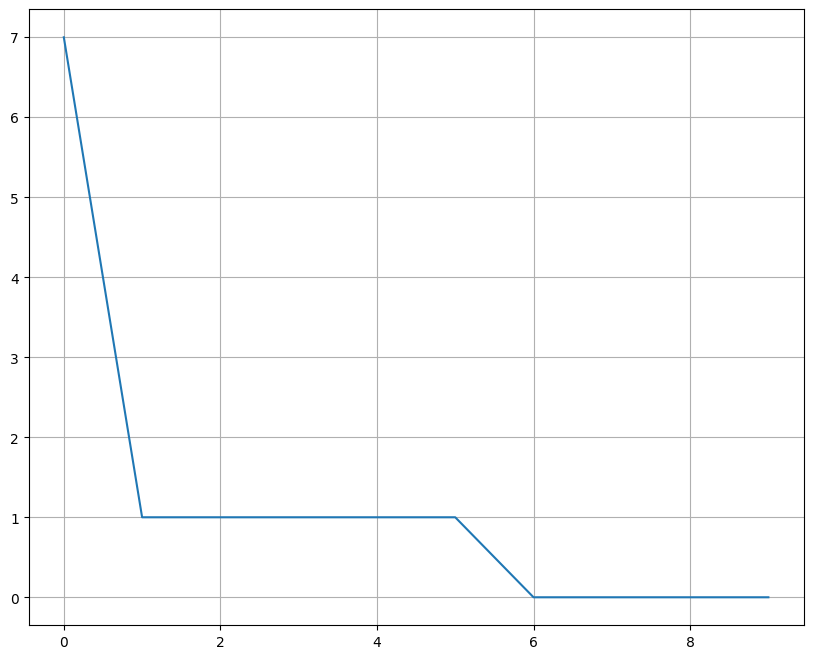

In [149]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1):
        self.weights = np.random.randn(1, input_size) * 0.1  # Initialize weights
        self.bias = np.random.randn() * 0.1  # Initialize bias
        self.learning_rate = learning_rate
        self.history = []

    def step(self, x):
        """Step activation function."""
        return np.where(x < 0.5, 0, 1)

    def forward(self, x):
        """Forward pass."""
        return self.step(np.dot(self.weights, x.T) + self.bias)

    def predict(self, x):
        """Predict output for input x."""
        return self.step(np.dot(x, self.weights.T) + self.bias)

    def train(self, x, y, epochs=10):
        """Train the perceptron."""
        for epoch in range(epochs):
            # Forward pass
            predictions = self.forward(x)
            
            # Compute loss
            loss = np.sum((y - predictions) ** 2)
            
            # Backpropagation
            error = y - predictions
            d_weights = -2 * np.dot(error, x)
            d_bias = -2 * np.sum(error)
            
            # Update weights and bias
            self.weights -= self.learning_rate * d_weights
            self.bias -= self.learning_rate * d_bias
            
        
            print(f"Epoch {epoch}, Loss: {loss}")
            self.history.append(loss)

    def plot_loss(self):
        plt.figure(figsize=(10,8))
        plt.plot(self.history)
        plt.grid(True)
        plt.show()

# Example usage
input_data = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1],
                       [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])
target_labels = np.array([[0,1,1,1,1,1,1,1]])

perceptron = Perceptron(input_size=input_data.shape[1], learning_rate=0.1)
perceptron.train(input_data, target_labels)

# Test the perceptron
test_data = np.array([[0, 0, 0], [1, 1, 1]])
predictions = perceptron.predict(test_data)
print("Predictions:", predictions)
perceptron.plot_loss()